# Project: Wrangling and Analyze Data

## Gathering Data

##### 1. Downloaded the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) and saved in the same folder as my jupiter notebook.

Importing Libraries

In [12]:
df_archive.shape

(2356, 17)

#### 2. Used Requests library to download the tweet image prediction programatically (image_predictions.tsv)

In [17]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response.status_code

200

In [18]:
with open ("image_predictions.tsv", mode = 'wb') as file:
    file.write(response.content)

In [19]:
df_images_predictions = pd.read_csv("image_predictions.tsv", sep='\t')
df_images_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [20]:
df_images_predictions.shape

(2075, 12)

#### 3. Used Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [24]:
tweet_ids=df_archive.tweet_id.values
len(tweet_ids)

2356

In [30]:
json_df = pd.read_json("tweet_json.txt", lines=True, encoding='utf-8')
json_df.head()

created_at                  id              id_str  \
0 2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
1 2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   
2 2017-07-29 00:08:17+00:00  891087950875897856  891087950875897856   
3 2017-07-28 16:27:12+00:00  890971913173991426  890971913173991424   
4 2017-07-28 00:22:40+00:00  890729181411237888  890729181411237888   

                                                                                                                                                                full_text  \
0                                                                 This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
1      This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   
2      Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh   
3  Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl   
4                          When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq   

   truncated display_text_range  \
0      False            [0, 79]   
1      False           [0, 138]   
2      False           [0, 138]   
3      False           [0, 140]   
4      False           [0, 118]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          entities  \
0                                                                                                                            {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'url': 'https://t.co/tD36da7qLQ', 'display_url': 'pic.twitter.com/tD36da7qLQ', 'expanded_url': 'https://twitter.com/dog_rates/status/891689557279858688/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 901, 'h': 1200, 'resize': 'fit'}, 'large': {'w': 1201, 'h': 1600, 'resize': 'fit'}}}]}   
1                                                                                   {'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891327551943041024, 'id_str': '891327551943041024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg', 'url': 'https://t.co/AtUZn91f7f', 'display_url': 'pic.twitter.com/AtUZn91f7f', 'expanded_url': 'https://twitter.com/dog_rates/status/891327558926688256/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 720, 'h': 540, 'resize': 'fit'}, 'large': {'w': 720, 'h': 540, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 

In [31]:
json_df = json_df[['id','favorite_count','retweet_count']]

In [32]:
json_df.head()

id  favorite_count  retweet_count
0  891689557279858688           35911           7097
1  891327558926688256           34329           7616
2  891087950875897856           17280           2552
3  890971913173991426           10079           1621
4  890729181411237888           55406          15466

In [33]:
json_df.columns = ['tweet_id','favorite_count','retweet_count']

In [34]:
json_df.head()

tweet_id  favorite_count  retweet_count
0  891689557279858688           35911           7097
1  891327558926688256           34329           7616
2  891087950875897856           17280           2552
3  890971913173991426           10079           1621
4  890729181411237888           55406          15466

In [35]:
json_df.shape

(2315, 3)

In [36]:
complete_df=df_archive.merge(df_images_predictions, how='left', on='tweet_id').merge(json_df, how='left', on='tweet_id')

In [37]:
complete_df.shape

(2356, 30)

In [38]:
complete_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

##### Save gathered and combined dataframe to csv and store on local folder

In [44]:
complete_df.to_csv('combined_df.csv', index= False)

##### Read combined csv file.

In [4]:
df=pd.read_csv('combined_df.csv')
df.sample(15)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
672   789903600034189313                    NaN                  NaN   
1185  718613305783398402                    NaN                  NaN   
1652  683481228088049664                    NaN                  NaN   
611   797165961484890113           7.971238e+17           29166305.0   
179   857214891891077121           8.571567e+17          180670967.0   
1927  674051556661161984                    NaN                  NaN   
1561  688385280030670848                    NaN                  NaN   
1694  681281657291280384                    NaN                  NaN   
677   789280767834746880                    NaN                  NaN   
831   768609597686943744                    NaN                  NaN   
1132  728760639972315136                    NaN                  NaN   
2075  670840546554966016                    NaN                  NaN   
1475  693642232151285760                    NaN                  NaN   
798   772877495989305348                    NaN                  NaN   
1192  717790033953034240                    NaN                  NaN   

                      timestamp  \
672   2016-10-22 18:57:48 +0000   
1185  2016-04-09 01:35:37 +0000   
1652  2016-01-03 02:53:17 +0000   
611   2016-11-11 19:55:50 +0000   
179   2017-04-26 12:48:51 +0000   
1927  2015-12-08 02:23:09 +0000   
1561  2016-01-16 15:40:14 +0000   
1694  2015-12-28 01:12:59 +0000   
677   2016-10-21 01:42:53 +0000   
831   2016-08-25 00:43:02 +0000   
1132  2016-05-07 01:37:30 +0000   
2075  2015-11-29 05:43:44 +0000   
1475  2016-01-31 03:49:30 +0000   
798   2016-09-05 19:22:09 +0000   
1192  2016-04-06 19:04:14 +0000   

                                                                                  source  \
672                      <a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>   
1185  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1652  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
611   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
179   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1927  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1561  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1694  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
677   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
831   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1132  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2075  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1475  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
798                   <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>   
1192  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                              text  \
672                                  This is Ralphy. His dreams were just shattered. Poor pupper. 13/10 it'll be ok Ralphy https://t.co/P0kSN6rT6H   
1185                  This is Carper. He's a Tortellini Angiosperm. In desperate need of a petting. 11/10 would hug softly https://t.co/lK9YDkRzPj   
1652  Meet Banjo. He's a Peppercorn Shoop Da Whoop. Nails look lethal. Skeptical of luminescent orb 11/10 stay woke pupper https://t.co/H7NZFumpKq   
611                                                                                        @JODYHiGHROLLER it may be an 11/10 but what do I know 😉   
179                                                                            

## Assessing the data

In [47]:
df.head(50)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0   892420643555336193                    NaN                  NaN   
1   892177421306343426                    NaN                  NaN   
2   891815181378084864                    NaN                  NaN   
3   891689557279858688                    NaN                  NaN   
4   891327558926688256                    NaN                  NaN   
5   891087950875897856                    NaN                  NaN   
6   890971913173991426                    NaN                  NaN   
7   890729181411237888                    NaN                  NaN   
8   890609185150312448                    NaN                  NaN   
9   890240255349198849                    NaN                  NaN   
10  890006608113172480                    NaN                  NaN   
11  889880896479866881                    NaN                  NaN   
12  889665388333682689                    NaN                  NaN   
13  889638837579907072                    NaN                  NaN   
14  889531135344209921                    NaN                  NaN   
15  889278841981685760                    NaN                  NaN   
16  888917238123831296                    NaN                  NaN   
17  888804989199671297                    NaN                  NaN   
18  888554962724278272                    NaN                  NaN   
19  888202515573088257                    NaN                  NaN   
20  888078434458587136                    NaN                  NaN   
21  887705289381826560                    NaN                  NaN   
22  887517139158093824                    NaN                  NaN   
23  887473957103951883                    NaN                  NaN   
24  887343217045368832                    NaN                  NaN   
25  887101392804085760                    NaN                  NaN   
26  886983233522544640                    NaN                  NaN   
27  886736880519319552                    NaN                  NaN   
28  886680336477933568                    NaN                  NaN   
29  886366144734445568                    NaN                  NaN   
30  886267009285017600           8.862664e+17         2.281182e+09   
31  886258384151887873                    NaN                  NaN   
32  886054160059072513                    NaN                  NaN   
33  885984800019947520                    NaN                  NaN   
34  885528943205470208                    NaN                  NaN   
35  885518971528720385                    NaN                  NaN   
36  885311592912609280                    NaN                  NaN   
37  885167619883638784                    NaN                  NaN   
38  884925521741709313                    NaN                  NaN   
39  884876753390489601                    NaN                  NaN   
40  884562892145688576                    NaN                  NaN   
41  884441805382717440                    NaN                  NaN   
42  884247878851493888                    NaN                  NaN   
43  884162670584377345                    NaN                  NaN   
44  883838122936631299                    NaN                  NaN   
45  883482846933004288                    NaN                  NaN   
46  883360690899218434                    NaN                  NaN   
47  883117836046086144                    NaN                  NaN   
48  882992080364220416                    NaN                  NaN   
49  882762694511734784                    NaN                  NaN   

                    timestamp  \
0   2017-08-01 16:23:56 +0000   
1   2017-08-01 00:17:27 +0000   
2   2017-07-31 00:18:03 +0000   
3   2017-07-30 15:58:51 +0000   
4   2017-07-29 16:00:24 +0000   
5   2017-07-29 00:08:17 +0000   
6   2017-07-28 16:27:12 +0000   
7   2017-07-28 00:22:40 +0000   
8   2017-07-27 16:25:51 +0000   
9   2017-07-26 15:59:51 +0000   
10  2017-07-26 00:31:25 +0000   
11  2017-07-25 16:11:53 +0000   
12  2017-07-25

#### Display the oldest and earliest date

In [66]:
df["timestamp"].min()

'2015-11-15 22:32:08 +0000'

In [67]:
df["timestamp"].max()

'2017-08-01 16:23:56 +0000'

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [69]:
df.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator      img_num      p1_conf       p2_conf  \
count         2356.000000  2075.000000  2075.000000  2.075000e+03   
mean            10.455433     1.203855     0.594548  1.345886e-01   
std              6.745237     0.561875     0.271174  1.006657e-01   
min              0.000000     1.000000     0.044333  1.011300e-08   
25%             10.000000     1.000000     0.364412  5.388625e-02   
50%             10.000000     1.000000     0.588230  1.181810e-01   
75%             10.000000     1.000000     0.843855  1.955655e-01   
max            170.000000     4.000000     1.000000  4.880140e-01   

            p3_conf  favorite_count  retweet_count  
count  2.075000e+03     2315.000000    2315.000000  
mean   6.032417e-02     6864.434989    2429.272570  
std    5.090593e-02    10676.059795    4116.666998  
min    1.740170e-10        0.000000       0.000000  
25%    1.622240e-02     1191.000000     487.000000  
50%    4.944380e-02     2985.000000    1128.000000  
75%    9.180755e-02     8402.000000    2809.000000  
max    2.734190e-01   141863.000000   69479.000000

#### Value_count (Programmatic assessment)

In [80]:
df['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
snowmobile              1
prayer_rug              1
killer_whale            1
soccer_ball             1
coral_reef              1
Name: p1, Length: 378, dtype: int64

In [81]:
df['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
tarantula               1
cloak                   1
snail                   1
chain_mail              1
coral_reef              1
Name: p2, Length: 405, dtype: int64

In [82]:
df['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
padlock                1
wing                   1
soap_dispenser         1
toyshop                1
coral_reef             1
Name: p3, Length: 408, dtype: int64

In [84]:
df['name'].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
            ... 
Rambo          1
Hanz           1
Julius         1
Chadrick       1
Enchilada      1
Name: name, Length: 957, dtype: int64

#### check for duplicates

In [104]:
df.duplicated('tweet_id').sum()

0

In [98]:
df[df.duplicated('tweet_id')]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, favorite_count, retweet_count]
Index: []

In [101]:
df.duplicated('jpg_url').sum()

346

In [102]:
df[df.duplicated('jpg_url')]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
23    887473957103951883                    NaN                  NaN   
32    886054160059072513                    NaN                  NaN   
35    885518971528720385                    NaN                  NaN   
42    884247878851493888                    NaN                  NaN   
55    881633300179243008           8.816070e+17         4.738443e+07   
...                  ...                    ...                  ...   
2149  669684865554620416           6.693544e+17         4.196984e+09   
2189  668967877119254528           6.689207e+17         2.143566e+07   
2212  668587383441514497                    NaN                  NaN   
2269  667509364010450944                    NaN                  NaN   
2298  667070482143944705           6.670655e+17         4.196984e+09   

                      timestamp  \
23    2017-07-19 00:47:34 +0000   
32    2017-07-15 02:45:48 +0000   
35    2017-07-13 15:19:09 +0000   
42    2017-07-10 03:08:17 +0000   
55    2017-07-02 21:58:53 +0000   
...                         ...   
2149  2015-11-26 01:11:28 +0000   
2189  2015-11-24 01:42:25 +0000   
2212  2015-11-23 00:30:28 +0000   
2269  2015-11-20 01:06:48 +0000   
2298  2015-11-18 20:02:51 +0000   

                                                                                  source  \
23    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
32    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
35    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
42    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
55    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
...                                                                                  ...   
2149  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2189  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2212                     <a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>   
2269                  <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>   
2298  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                        text  \
23               This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX   
32                                                                                        RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo   
35                                                                   I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk   
42          OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj   
55                                               @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s   
...                                                                                                                                      ...   
2149           After countless hours of research and hundreds of formula alterations we have concluded that Dug should be bumped to an 11/10   
2189                                                                                                          12/10 good shit Bubka\n@wane15   
2212  Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3   
2269                    This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7   
2298                                     

In [107]:
df.duplicated('expanded_urls').sum()

137

In [109]:
df[df.duplicated('expanded_urls')]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
75    878281511006478336                    NaN                  NaN   
76    878057613040115712                    NaN                  NaN   
98    873213775632977920                    NaN                  NaN   
...                  ...                    ...                  ...   
2286  667182792070062081                    NaN                  NaN   
2293  667152164079423490                    NaN                  NaN   
2294  667138269671505920                    NaN                  NaN   
2298  667070482143944705           6.670655e+17         4.196984e+09   
2338  666104133288665088                    NaN                  NaN   

                      timestamp  \
55    2017-07-02 21:58:53 +0000   
64    2017-06-27 12:14:36 +0000   
75    2017-06-23 16:00:04 +0000   
76    2017-06-23 01:10:23 +0000   
98    2017-06-09 16:22:42 +0000   
...                         ...   
2286  2015-11-19 03:29:07 +0000   
2293  2015-11-19 01:27:25 +0000   
2294  2015-11-19 00:32:12 +0000   
2298  2015-11-18 20:02:51 +0000   
2338  2015-11-16 04:02:55 +0000   

                                                                                  source  \
55    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
64    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
75    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
76    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
98    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
...                                                                                  ...   
2286  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2293  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2294  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2298  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2338  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                        text  \
55                                                                               @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s   
64                                                                                                                                           @RealKentMurphy 14/10 confirmed   
75    Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps://t.co/245xJJElsY https://t.co/lUiQH219v6   
76                               This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe   
98    This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her whole life. Help Sierra below\n\nhttps://t.co/Xp01EU3qyD https://t.co/V5lkvrGLdQ   
...                                                                                                                                                                      ...   
2286                               This is Timison. He just told an awful joke but is still hanging on to the hope that you'll laugh with him. 10/10 https://t.co/s2yYuHabWl   
2293                         This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://t.co/h9R0EwKd9X   
2294                                     

#### Check for null

In [111]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
jpg_url                        281
img_num                        281
p1                             281
p1_conf                        281
p1_dog                         281
p2                             281
p2_conf                        281
p2_dog                         281
p3                             281
p3_conf                        281
p3_dog                         281
favorite_count      

### Quality issues
1. Erroneous datatype in timestamp column


2. Unnecessary data (retweets), Missing data (jpg_url, expanded_urls favorite_count, retweet_count, p3_dog, p3_conf, p3, p2_dog, p2_conf, p2, p1_dog, p1_conf, p1) and Irrelevant Columns (in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)


3. pc1_conf, pc2_conf, pc3_conf aren't expressed as percentage.

4. Words (name of dogs) are displayed in a unnatural way, words are separated by underscore.


5. Inconsistent Initial capitalization (p1, p2, p3).


6. "source" column contains html tags. The required variable is enclosed within the html tags.


7. Missing values in favorite_count and retweet_count columns


8. Missing values in "name" column expressed as "None" and "a"


### Tidiness issues
1. doggo, floofer, pupper, puppo should be one column called "dog_stages". Dog stages not accurately extracted from the "text" column e.g floofs not interpreted as floof(er) stage.


2. "text" and "expanded_urls" contain more than one variable.

## Cleaning Data

### Making a copy of the original combined dataframe before cleaning

In [5]:
df_clean = df.copy()

### Issue #1:

In [21]:
df_clean_1 = df_clean.copy()

#### Define
a. Use astype('datetime64') to force an appropriate dtype


b. Assign the astype again to the column in order to actually change the 'timestamp' column in the 
original dataframe.




In [23]:
# Code
df_clean_1['timestamp'] = df_clean_1['timestamp'].astype('datetime64')
df_clean_1['tweet_id'] = df_clean_1['tweet_id'].astype('str')

In [25]:
#Test
df_clean_1.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1     892177421306343426                    NaN                  NaN   
614   796759840936919040                    NaN                  NaN   
119   869772420881756160                    NaN                  NaN   
882   760290219849637889                    NaN                  NaN   
2112  670435821946826752                    NaN                  NaN   

               timestamp  \
1    2017-08-01 00:17:27   
614  2016-11-10 17:02:03   
119  2017-05-31 04:27:59   
882  2016-08-02 01:44:48   
2112 2015-11-28 02:55:30   

                                                                                  source  \
1     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
614   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
119   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
882                   <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>   
2112  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                    text  \
1     This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
614                              Say hello to Romeo. He was just told that it's too cold for the pool. H*ckin nonsense. 11/10 would help fill up https://t.co/6hx7ur6sNI   
119                               This is Dewey (pronounced "covfefe"). He's having a good walk. Arguably the best walk. 13/10 would snug softly https://t.co/HciEaJkC4D   
882                                                                  This is Rocco. He's doing his best. 13/10 someone help him (IG: rocco_roni) https://t.co/qFsl1nnXMv   
2112                                                          Two unbelievably athletic dogs here. Great form. Perfect execution. 10/10 for both https://t.co/sQuKwSKtDE   

      retweeted_status_id  retweeted_status_user_id  \
1                     NaN                       NaN   
614                   NaN                       NaN   
119                   NaN                       NaN   
882                   NaN                       NaN   
2112                  NaN                       NaN   

     retweeted_status_timestamp  \
1                           NaN   
614                         NaN   
119                         NaN   
882                         NaN   
2112                        NaN   

                                                                                                                        expanded_urls  \
1                                                                     https://twitter.com/dog_rates/status/892177421306343426/photo/1   
614   https://twitter.com/dog_rates/status/796759840936919040/photo/1,https://twitter.com/dog_rates/status/796759840936919040/photo/1   
119                                                                   https://twitter.com/dog_rates/status/869772420881756160/photo/1   
882                                                                   https://twitter.com/dog_rates/status/760290219849637889/video/1   
2112                                                                  https://twitter.com/dog_rates/status/670435821946826752/photo/1   

      rating_numerator  rating_denominator   name doggo floofer pupper puppo  \
1                   13                  10  Tilly  None    None   None  None   
614                 11                  10  Romeo  None    None   None  None   
119                 13                  10  Dewey  None    None   None  None   
882                 13                  10  Rocco  None    None   None  None   
2112                10                  10   None  None    None

In [24]:
# Test 2
df_clean_1.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
jpg_url                               object
img_num                              float64
p1                                    object
p1_conf                              float64
p1_dog                                object
p2        

### Issue #2:

In [59]:
df_clean_2 = df_clean_1.copy()

#### Define

a. Create a regex that matches all retweets, strings starting with either 'RT' or '@' in the 'text' column.

b. Pass the regex condition into a drop index method to delete all rows that starts with RT or @ in the text column.

c. Delete unneccessary column using drop method

d. Drop all rows with missing values using dropna method

#### Code

In [60]:
# Match row that start with RT or @
regex = '^RT|@'
# Pass the regex into the drop index method to delete all retweets 
df_clean_2 = df_clean_2.drop(df_clean_2[df_clean.text.str.match(regex)].index)

In [61]:
# drop all unnecessary columns
df_clean_2.drop(columns=['in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

In [62]:
# drop all rows that contain missing records- records without images
df_clean_2.dropna(subset =['jpg_url'], inplace=True)

In [63]:
# Test
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1993 non-null   object        
 1   timestamp           1993 non-null   datetime64[ns]
 2   source              1993 non-null   object        
 3   text                1993 non-null   object        
 4   expanded_urls       1993 non-null   object        
 5   rating_numerator    1993 non-null   int64         
 6   rating_denominator  1993 non-null   int64         
 7   name                1993 non-null   object        
 8   doggo               1993 non-null   object        
 9   floofer             1993 non-null   object        
 10  pupper              1993 non-null   object        
 11  puppo               1993 non-null   object        
 12  jpg_url             1993 non-null   object        
 13  img_num             1993 non-null   float64     

### Issue #3:

In [64]:
df_clean_3 = df_clean_2.copy()

#### Define

a. Select each column and multiply by 100

b. round up to 2 dp.

#### Code

In [65]:
df_clean_3['p1_conf']= np.round(df_clean_3['p1_conf']*100, decimals =2)
df_clean_3['p2_conf']= np.round(df_clean_3['p2_conf']*100, decimals =2)
df_clean_3['p3_conf']= np.round(df_clean_3['p3_conf']*100, decimals =2)

In [66]:
# Test
df_clean_3.sample(5)

tweet_id           timestamp  \
349   831650051525054464 2017-02-14 23:43:18   
2335  666287406224695296 2015-11-16 16:11:11   
1546  689283819090870273 2016-01-19 03:10:43   
1148  726887082820554753 2016-05-01 21:32:40   
592   798933969379225600 2016-11-16 17:01:16   

                                                                                  source  \
349   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2335  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1546  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1148  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
592   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                      text  \
349   I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t.co/piiX0ke8Z6 https://t.co/1UHrKcaCiO   
2335                              This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv   
1546                              Say hello to Chipson. He's aerodynamic af. No eyes (devastating). 9/10 would make sure he didn't bump into stuff https://t.co/V62rIva61J   
1148                             This is Blitz. He's a new dad struggling to cope mentally with the pressures of being a father. Sick shades 10/10 https://t.co/2AVcJ2BZsy   
592                                                                                    This is Iroh. He's in a predicament. 12/10 someone help him https://t.co/KJAKO2kXsL   

                                                                                                                                                                                                                                                                                                  expanded_urls  \
349   http://www.gofundme.com/bluethewhitehusky,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1   
2335                                                                                                                                                                                                                                            https://twitter.com/dog_rates/status/666287406224695296/photo/1   
1546                                                                                                                                                                                                                                            https://twitter.com/dog_rates/status/689283819090870273/photo/1   
1148                                                                                                                                                                                                                                            https://twitter.com/dog_rates/status/726887082820554753/photo/1   
592                                                                                                                                                                             https://twitter.com/dog_rates/status/798933969379225600/photo/1,https://twitter.com/dog_rates/status/798933969379225600/photo/1   

      rating_numerator  rating_denominator     name doggo floofer pupper  \
349                 13                  10     None  None    None   None   
2335                 1                   2       an  None    None   None   
1546                 9                  10  Chipson  None 

### Issue #4:

In [67]:
df_clean_4 = df_clean_3.copy()

#### Define
a. Use the str.replace method to replace "_" with " " and store in a new column

b. Drop the old column

c. Rename the new column back to it's original name.

#### Code

In [68]:
# Since strings are immutable, store in a new variable
df_clean_4['p1_1']=df_clean_4['p1'].str.replace("_"," ")
df_clean_4['p2_2']=df_clean_4['p2'].str.replace("_"," ")
df_clean_4['p3_3']=df_clean_4['p3'].str.replace("_"," ")

In [69]:
# Delete the old variables
df_clean_4.drop(columns=['p1', 'p2', 'p3'], inplace=True)

In [70]:
# Rename the new columns back to the old names
df_clean_4.rename(columns={"p1_1":"p1", "p2_2":"p2", "p3_3":"p3"}, inplace=True)

In [71]:
# Test
df_clean_4.sample(5)

tweet_id           timestamp  \
1839  675891555769696257 2015-12-13 04:14:39   
1561  688385280030670848 2016-01-16 15:40:14   
1731  679844490799091713 2015-12-24 02:02:12   
1576  687460506001633280 2016-01-14 02:25:31   
2314  666701168228331520 2015-11-17 19:35:19   

                                                                                  source  \
1839  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1561  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1731  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1576  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2314  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                              text  \
1839   This is Donny. He's summoning the demon monster Babadook. 6/10 Donny please no that won't be a good time for anyone https://t.co/kiW6Knb7Gp   
1561                                                This is Louis. He's takes top-notch selfies. 12/10 would snapchat with https://t.co/vz2DukO0th   
1731                       This is Willie. He's floating away and needs your assistance. Please someone help Willie. 10/10 https://t.co/MJqygWqt8X   
1576  This is Kramer. He's a Picasso Tortellini. Tie couldn't be more accurate. Confident af. Runs his own business. 10/10 https://t.co/jIcVW0xxmH   
2314   This is a golden Buckminsterfullerene named Johm. Drives trucks. Lumberjack (?). Enjoys wall. 8/10 would hug softly https://t.co/uQbZJM2DQB   

                                                                                                                                                                                                                                                        expanded_urls  \
1839                                                                                                                                                                                                  https://twitter.com/dog_rates/status/675891555769696257/photo/1   
1561  https://twitter.com/dog_rates/status/688385280030670848/photo/1,https://twitter.com/dog_rates/status/688385280030670848/photo/1,https://twitter.com/dog_rates/status/688385280030670848/photo/1,https://twitter.com/dog_rates/status/688385280030670848/photo/1   
1731                                                                                                                                                                                                  https://twitter.com/dog_rates/status/679844490799091713/photo/1   
1576                                                                                                                                                                                                  https://twitter.com/dog_rates/status/687460506001633280/photo/1   
2314                                                                                                                                                                                                  https://twitter.com/dog_rates/status/666701168228331520/photo/1   

      rating_numerator  rating_denominator    name doggo floofer pupper puppo  \
1839                 6                  10   Donny  None    None   None  None   
1561                12                  10   Louis  None    None   None  None   
1731                10                  10  Willie  None    None   None  None   
1576                10                  10  Kramer  None    None   None  None   
2314                 8                  10       a  None    None   None  None   

                                              jpg_url  img_num  p1_conf  \
1839  https://pbs.twimg.com/media/CWE_x33UwAEE3no.jpg      1.0    30.56   
1561  https://pbs.twimg.com/media/CY2iwGNWUAI

### Issue #5:

In [72]:
df_clean_5 = df_clean_4.copy()

#### Define

Select each column and apply str.title method on the column

#### Code

In [73]:
df_clean_5['p1']=df_clean_5['p1'].str.title()
df_clean_5['p2']=df_clean_5['p2'].str.title()
df_clean_5['p3']=df_clean_5['p3'].str.title()

In [74]:
# Test
df_clean_5.sample(3)

tweet_id           timestamp  \
2168  669354382627049472 2015-11-25 03:18:15   
0     892420643555336193 2017-08-01 16:23:56   
1645  683849932751646720 2016-01-04 03:18:23   

                                                                                  source  \
2168  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
0     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1645  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                     text  \
2168                                                     Meet Dug. Dug fucken loves peaches. 8/10 https://t.co/JtA1TG21Xx   
0           This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1645  This is Jiminy. He's not the brightest dog. Needs to lay off the kibble. 5/10 still petable https://t.co/omln4LOy1x   

                                                        expanded_urls  \
2168  https://twitter.com/dog_rates/status/669354382627049472/photo/1   
0     https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1645  https://twitter.com/dog_rates/status/683849932751646720/photo/1   

      rating_numerator  rating_denominator     name doggo floofer pupper  \
2168                 8                  10      Dug  None    None   None   
0                   13                  10  Phineas  None    None   None   
1645                 5                  10   Jiminy  None    None   None   

     puppo                                          jpg_url  img_num  p1_conf  \
2168  None  https://pbs.twimg.com/media/CUoGQjdXAAAkaz2.jpg      1.0    97.40   
0     None  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0     9.70   
1645  None  https://pbs.twimg.com/media/CX2F4qNUQAAR6Cm.jpg      1.0    45.89   

     p1_dog  p2_conf p2_dog  p3_conf p3_dog  favorite_count  retweet_count  \
2168   True     1.08   True     0.21   True          2333.0         1076.0   
0     False     8.59  False     7.61  False             NaN            NaN   
1645  False    16.49   True    11.17  False          2364.0          841.0   

             p1                p2         p3  
2168  Chihuahua    French Bulldog   Pekinese  
0        Orange             Bagel     Banana  
1645        Hog  Mexican Hairless  Wild Boar

### Issue #6:

In [75]:
df_clean_6 = df_clean_5.copy()

#### Define

a. Create a regex to extract only the text within the html tag

b. Extract the text into a new column "tweet_source"

c. Drop the old column "source"

d. Rename the new column with the old column name

#### Code

In [77]:
regex = r'^<.*">(?P<tweet_source>.*)<.a>$'

df_clean_6['tweet_source'] = df_clean_6['source'].str.extract(regex)

In [78]:
# Drop the old column
df_clean_6.drop(columns=['source'], inplace=True)

In [79]:
# rename the new column to the old column name
df_clean_6.rename(columns={"tweet_source":"source"}, inplace=True)

In [80]:
# Test
df_clean_6.sample(5)

tweet_id           timestamp  \
471   816697700272001025 2017-01-04 17:27:59   
638   793271401113350145 2016-11-01 02:00:14   
2011  672245253877968896 2015-12-03 02:45:32   
882   760290219849637889 2016-08-02 01:44:48   
1600  686007916130873345 2016-01-10 02:13:27   

                                                                                                                                                text  \
471                      This is Binky. She appears to be rather h*ckin cozy. Nifty leg cross as well. 12/10 would snug well https://t.co/WFt82XLyEF   
638   Meet Dave. It's his favorite day of the year. He gets to fulfill his dream of being a dinosaur. 12/10 inspirational af https://t.co/MgQSdfZGPN   
2011                    Meet Snickers. He's adorable. Also comes in t-shirt mode. 12/10 I would aggressively caress Snickers https://t.co/aCRKDaFmVr   
882                                              This is Rocco. He's doing his best. 13/10 someone help him (IG: rocco_roni) https://t.co/qFsl1nnXMv   
1600                                                         This pupper has a magical eye. 11/10 I can't stop looking at it https://t.co/heAGpKTpPW   

                                                                                                                        expanded_urls  \
471   https://twitter.com/dog_rates/status/816697700272001025/photo/1,https://twitter.com/dog_rates/status/816697700272001025/photo/1   
638                                                                   https://twitter.com/dog_rates/status/793271401113350145/photo/1   
2011                                                                  https://twitter.com/dog_rates/status/672245253877968896/photo/1   
882                                                                   https://twitter.com/dog_rates/status/760290219849637889/video/1   
1600                                                                  https://twitter.com/dog_rates/status/686007916130873345/photo/1   

      rating_numerator  rating_denominator      name doggo floofer  pupper  \
471                 12                  10     Binky  None    None    None   
638                 12                  10      Dave  None    None    None   
2011                12                  10  Snickers  None    None    None   
882                 13                  10     Rocco  None    None    None   
1600                11                  10      None  None    None  pupper   

     puppo  \
471   None   
638   None   
2011  None   
882   None   
1600  None   

                                                                                      jpg_url  \
471                                           https://pbs.twimg.com/media/C1V-K63UAAEUHqw.jpg   
638                                           https://pbs.twimg.com/media/CwJEIKTWYAAvL-T.jpg   
2011                                          https://pbs.twimg.com/media/CVRLfeoW4AA_ldZ.jpg   
882   https://pbs.twimg.com/ext_tw_video_thumb/760289324994879489/pu/img/3ItvBEoo4aebPfvr.jpg   
1600                                          https://pbs.twimg.com/media/CYUwjz-UAAEcdi8.jpg   

      img_num  p1_conf p1_dog  p2_conf p2_dog  p3_conf p3_dog  favorite_count  \
471       1.0    75.70   True     5.28   True     4.76   True          9022.0   
638       1.0    23.17   True    20.67   True     7.01   True          8026.0   
2011      1.0    71.89   True    17.85  False     3.71   True           595.0   
882       1.0    30.22   True    25.88   True    17.92   True         24469.0   
1600      1.0    88.53   True     4.23   True     1.05  False          2240.0   

      retweet_count                    p1          p2           p3  \
471          2017.0             Chihuahua  Pomeranian  Maltese Dog   
638          2220.0        Siberian Husky  Eskimo Dog     Pembroke   
2011          128.0             Chihuahua      Badger  Toy Terrier   
882         10403.0  Old English Sheepdog       Lhasa       Briard   
1600          356

### Issue #7:

In [96]:
df_clean_7 = df_clean_6.copy()

#### Code

In [97]:
# calc median for retweet and favorite count columns
median_retweet_count = np.median(df_clean_7.retweet_count.dropna())
median_favorite_count = np.median(df_clean_7.favorite_count.dropna())

display(median_retweet_count, median_favorite_count)

1061.0

3378.0

In [98]:
# fillna with the median value. Mean value was too high
df_clean_7.retweet_count.fillna(median_retweet_count, inplace = True)
df_clean_7.favorite_count.fillna(median_favorite_count, inplace = True)

In [102]:
# convert the data type to int64
df_clean_7.retweet_count = df_clean_7.retweet_count.astype('int64')
df_clean_7.favorite_count = df_clean_7.favorite_count.astype('int64')

#### Test

In [103]:
df_clean_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1993 non-null   object        
 1   timestamp           1993 non-null   datetime64[ns]
 2   text                1993 non-null   object        
 3   expanded_urls       1993 non-null   object        
 4   rating_numerator    1993 non-null   int64         
 5   rating_denominator  1993 non-null   int64         
 6   name                1993 non-null   object        
 7   doggo               1993 non-null   object        
 8   floofer             1993 non-null   object        
 9   pupper              1993 non-null   object        
 10  puppo               1993 non-null   object        
 11  jpg_url             1993 non-null   object        
 12  img_num             1993 non-null   float64       
 13  p1_conf             1993 non-null   float64     

### Issue #8:

In [113]:
df_clean_8 = df_clean_7.copy()

In [ ]:
#### Define

#### Code

In [115]:
# store all inapproprate names in a list
incorrect_names = ['a', 'an', 'the', 'just', 'one', 'very', 'quite', 'not', 'actually', 
             'mad', 'space', 'infuriating', 'all', 'officially', '0', 'old', 'life',
             'unacceptable', 'my', 'incredibly', 'by', 'his', 'such']

In [116]:
# Iterate over the column 'name' in the dataframe and replace where there is a match with None

for name in df_clean_8.name:
    if name in incorrect_names:
        df_clean_8.name[df_clean_8.name == name] = 'None'

#### Test

In [117]:
df_clean_8.name.value_counts()[:5]

None       639
Charlie     11
Cooper      10
Lucy        10
Oliver      10
Name: name, dtype: int64

### Issue #9:

In [402]:
# Make a copy of dataframe before new cleaning step
df_clean_9 = df_clean_8.copy()

#### Define
a. Create a regex to capture the dog stages properly from the text column and extract the keyword into a new column

b. Delete the untidy columns 'doggo', 'floofer', 'pupper', 'puppo'

c. create a function to replace all typos incorrectly extracted dog stages in the new column

d. replace all missing values with none

e. Capitalize all variables in the dog_stage column

f. Change the datatype of the new column "dog_stage" to category

#### Code

In [403]:
# create a regex to properly extract the dog stages
regex = r'(dogg.|floof..|puppo|puppe.)'
# Extract the dog stages into a new column
df_clean_9['dog_stage'] = df_clean_9['text'].str.extract(regex)

In [404]:
# Drop redundant columns
df_clean_9.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [405]:
# create regex to match all four dog stages
regex = r'(dogg.)|(floof..)|(puppo)|(puppe.)'
#'doggo', 'floofer', 'pupper', 'puppo'

# create a function to find and replace all dog_stage
def convert_case (match_obj):
    if match_obj.group(1) is not None:
        return "doggo"
    if match_obj.group(2) is not None:
        return "floofer"
    if match_obj.group(3) is not None:
        return "puppo"
    if match_obj.group(4) is not None:
        return "pupper"
    else: 
        return "none"

# Aplly the function on the dataframe column
for dog_stage in df_clean_9.dog_stage:
    df_clean_9.dog_stage[df_clean_9.dog_stage == dog_stage] = re.sub(regex, convert_case, str(dog_stage))

<ipython-input-405-e3a18b0eeb9c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_9.dog_stage[df_clean_9.dog_stage == dog_stage] = re.sub(regex, convert_case, str(dog_stage))


In [406]:
# Fillna with "none" in dog_stage column. For some unknown reason the function returned NaN instead of "none"
df_clean_9.dog_stage.fillna("none", inplace = True)

In [407]:
# capitalize the variables in the dog_stage column
df_clean_9['dog_stage']=df_clean_9['dog_stage'].str.title()

In [408]:
# Change the new column to a categorical datatype
df_clean_9['dog_stage'] = df_clean_9.dog_stage.astype('category')

#### Test

In [409]:
df_clean_9.sample(20)

tweet_id           timestamp  \
1030  745433870967832576 2016-06-22 01:50:58   
1999  672523490734551040 2015-12-03 21:11:09   
898   758854675097526272 2016-07-29 02:40:28   
1622  684914660081053696 2016-01-07 01:49:14   
670   789986466051088384 2016-10-23 00:27:05   
417   822489057087389700 2017-01-20 17:00:46   
1126  729854734790754305 2016-05-10 02:05:03   
0     892420643555336193 2017-08-01 16:23:56   
697   786595970293370880 2016-10-13 15:54:28   
647   793135492858580992 2016-10-31 17:00:11   
226   848690551926992896 2017-04-03 00:16:10   
1745  679148763231985668 2015-12-22 03:57:37   
1869  675153376133427200 2015-12-11 03:21:23   
1553  688908934925697024 2016-01-18 02:21:04   
981   749417653287129088 2016-07-03 01:41:06   
293   837820167694528512 2017-03-04 00:21:08   
120   869702957897576449 2017-05-30 23:51:58   
1507  691675652215414786 2016-01-25 17:35:00   
814   771014301343748096 2016-08-31 15:58:28   
1393  700029284593901568 2016-02-17 18:49:22   

                                                                                                                                                                     text  \
1030                                          This is Lenox. She's in a wheelbarrow. Silly doggo. You don't belong there. 10/10 would push around https://t.co/oYbVR4nBsR   
1999                                       When she says she'll be ready in a minute but you've been waiting in the car for almost an hour. 10/10 https://t.co/EH0N3dFKUi   
898                                This is Lilli Bee &amp; Honey Bear. Unfortunately, they were both born with no eyes. So heckin sad. Both 11/10 https://t.co/4UrfOZhztW   
1622                                                                             "Hello yes I'll just get one of each color thanks" 12/10 for all https://t.co/AMDsllQs7a   
670                                                              This is Happy. He's a bathtub reviewer. Seems to be pleased with this one. 12/10 https://t.co/Ln89R4FP7v   
417                                                This is Paisley. She really wanted to be president this time. Dreams officially crushed. 13/10 https://t.co/liJGwMp17E   
1126                              Say hello to Ollie. He conducts this train. He also greets you as you enter. Kind af. 11/10 would pet so firmly https://t.co/jVxOGKEU0z   
0                                                           This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
697                                               This is Dale. He's a real spookster. Did me quite the frighten. 11/10 not too spooky to pet tho https://t.co/L8BWDD4oBX   
647                                                                       Your favorite squad is looking extra h*ckin spooky today. 13/10 for all https://t.co/PrgvOyPtDT   
226                       Please stop sending in animals other than dogs. We only rate dogs. Not Furry Ecuadorian Sea Turtles. Thank you... 12/10 https://t.co/UOE79zb6VU   
1745                            I know everyone's excited for Christmas but that doesn't mean you can send in reindeer. We only rate dogs... 8/10 https://t.co/eWjWgbOCYL   
1869                                            What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0   
1553                                                                                       Meet Clarence. He does parkour. 8/10 very talented dog https://t.co/WpSFZm7RPH   
981                                                                            This is Finn. He's the most unphotogenic pupper of all time. 11/10 https://t.co/qvA2rCUl6v   
293                                    Here's a pupper before and after being asked "who's a good girl?" Unsure as h*ck. 12/10 hint hint it's you https://t.co/ORiK6jlgdH   
120   Meet Stanley. He likes road trips. Will shift for you. One e

In [410]:
df_clean_9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1993 non-null   object        
 1   timestamp           1993 non-null   datetime64[ns]
 2   text                1993 non-null   object        
 3   expanded_urls       1993 non-null   object        
 4   rating_numerator    1993 non-null   int64         
 5   rating_denominator  1993 non-null   int64         
 6   name                1993 non-null   object        
 7   jpg_url             1993 non-null   object        
 8   img_num             1993 non-null   float64       
 9   p1_conf             1993 non-null   float64       
 10  p1_dog              1993 non-null   object        
 11  p2_conf             1993 non-null   float64       
 12  p2_dog              1993 non-null   object        
 13  p3_conf             1993 non-null   float64     

### Issue #10:

In [411]:
# Make a copy of dataframe before new cleaning step
df_clean_10 = df_clean_9.copy()

#### Define
a. Create a regex to separate the text and url from the text column 

b. Extract into seperate columns into a new dataframe

c. join the newly extracted column with the old one

d. drop the original text column, then rename the new column.

#### Code

In [412]:
# create regex to capture the url within the text of the 'text' column

regex = r'(?P<text_1>.*)(?P<url_text>https:.*)'

# extract the url into a new column 
df_clean_extract = df_clean_10['text'].str.extract(regex)

In [413]:
# Join the newly extracted dataframe with the old one
df_clean_10 = df_clean_10.join(df_clean_extract, how='left')

In [414]:
# drop the original text column
df_clean_10.drop(columns=['text'], inplace=True)

In [415]:
# rename the new column back to the old column
df_clean_10.rename(columns={'text_1':'text'}, inplace=True)

#### Test

In [416]:
df_clean_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2355
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1993 non-null   object        
 1   timestamp           1993 non-null   datetime64[ns]
 2   expanded_urls       1993 non-null   object        
 3   rating_numerator    1993 non-null   int64         
 4   rating_denominator  1993 non-null   int64         
 5   name                1993 non-null   object        
 6   jpg_url             1993 non-null   object        
 7   img_num             1993 non-null   float64       
 8   p1_conf             1993 non-null   float64       
 9   p1_dog              1993 non-null   object        
 10  p2_conf             1993 non-null   float64       
 11  p2_dog              1993 non-null   object        
 12  p3_conf             1993 non-null   float64       
 13  p3_dog              1993 non-null   object      

In [417]:
df_clean_10.sample(5)

tweet_id           timestamp  \
928   754747087846248448 2016-07-17 18:38:22   
1394  700002074055016451 2016-02-17 17:01:14   
691   787322443945877504 2016-10-15 16:01:13   
284   838921590096166913 2017-03-07 01:17:48   
169   859196978902773760 2017-05-02 00:04:57   

                                                        expanded_urls  \
928   https://twitter.com/dog_rates/status/754747087846248448/photo/1   
1394  https://twitter.com/dog_rates/status/700002074055016451/photo/1   
691   https://twitter.com/dog_rates/status/787322443945877504/photo/1   
284   https://twitter.com/dog_rates/status/838921590096166913/photo/1   
169   https://twitter.com/dog_rates/status/859196978902773760/video/1   

      rating_numerator  rating_denominator     name  \
928                 12                  10    Keith   
1394                 9                  10   Thumas   
691                 10                  10  Lincoln   
284                 13                  10     Arlo   
169                 12                  10     None   

                                                                                      jpg_url  \
928                                           https://pbs.twimg.com/media/CnlmeL3WgAA4c84.jpg   
1394                                          https://pbs.twimg.com/media/CbboKP4WIAAw8xq.jpg   
691                                           https://pbs.twimg.com/media/Cu0hlfwWYAEdnXO.jpg   
284                                           https://pbs.twimg.com/media/C6Ryuf7UoAAFX4a.jpg   
169   https://pbs.twimg.com/ext_tw_video_thumb/859196962498805762/pu/img/-yBpr4-o4GJZECYE.jpg   

      img_num  p1_conf p1_dog  p2_conf p2_dog  p3_conf p3_dog  favorite_count  \
928       1.0    47.15  False    25.08  False    11.79  False            2356   
1394      1.0    36.95   True    24.34   True    16.16   True            2965   
691       1.0    74.77  False    10.57   True     1.73  False            7207   
284       1.0    66.45   True    17.05   True     8.78   True           10139   
169       1.0    22.42  False    21.62   True    12.84  False           78486   

      retweet_count              p1                 p2                 p3  \
928             466      Rotisserie       Cash Machine       Sliding Door   
1394           1186       Chihuahua         Schipperke                Pug   
691            1606       Seat Belt   Golden Retriever              Dingo   
284            1823  Border Terrier  Brabancon Griffon  Yorkshire Terrier   
169           25828          Angora           Malamute        Persian Cat   

                  source dog_stage  \
928   Twitter for iPhone      None   
1394  Twitter for iPhone      None   
691   Twitter for iPhone      None   
284   Twitter for iPhone      None   
169   Twitter for iPhone      None   

                                                                                                                               text  \
928                             This is Keith. He's pursuing a more 2D lifestyle. Idiosyncratic af. 12/10 follow your dreams Keith    
1394          This is Thumas. He covered himself in nanners for maximum camouflage. It didn't work. I can still see u Thumas. 9/10    
691                      This is Lincoln. He forgot to use his blinker when he changed lanes just now. Guilty as h*ck. Still 10/10    
284               This is Arlo. He's officially the king of snowy tongue slips. 13/10 would comfort during inevitable brain freeze    
169   We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10    

                     url_text  
928   https://t.co/G9ufksBMlU  
1394  https://t.co/x0ZDlNqfb1  
691   https://t.co/lsrR83SiVp  
284   https://t.co/oXVu9pNZZv  
169   https://t.co/g2nSyGenG9

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [418]:
 df_clean_10.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [419]:
# read cleaned dataframe for Analysis
df_cleaned = pd.read_csv("twitter_archive_master.csv")

C:\Users\emman\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: module 'seaborn' has no attribute 'plt'

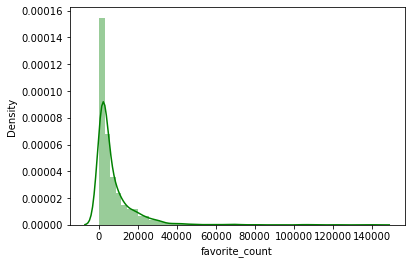

In [420]:
# PLot the distribution of the favorite_count column
sns.distplot(df_cleaned.favorite_count, color = 'green', label = 'favorite_count')

sns.plt.show()

C:\Users\emman\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: module 'seaborn' has no attribute 'plt'

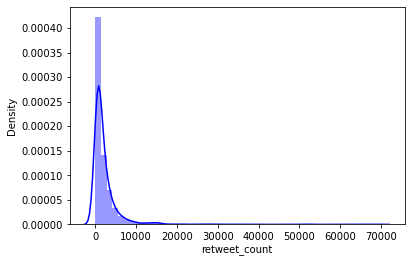

In [421]:
# PLot the distribution of the retweet_count column
sns.distplot(df_cleaned.retweet_count, color = 'blue', label = 'retweet_count')
sns.plt.show()

In [422]:
df_cleaned.retweet_count.describe()

count     1993.000000
mean      2193.445559
std       3937.609898
min         11.000000
25%        490.000000
50%       1061.000000
75%       2489.000000
max      69479.000000
Name: retweet_count, dtype: float64

In [440]:
df_cleaned.retweet_count.mode()

0    1061
dtype: int64

In [423]:
df_cleaned.favorite_count.describe()

count      1993.000000
mean       7463.666332
std       11034.666322
min          64.000000
25%        1621.000000
50%        3378.000000
75%        9257.000000
max      141863.000000
Name: favorite_count, dtype: float64

In [444]:
df_cleaned.favorite_count.mode()

0    3378
dtype: int64

AttributeError: module 'seaborn' has no attribute 'plt'

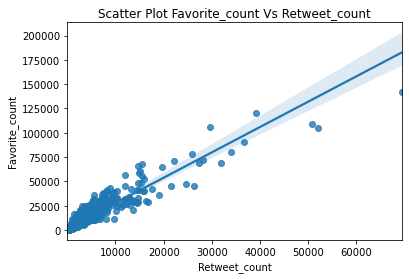

In [448]:
g = sns.regplot(x=df_cleaned.retweet_count, y=df_cleaned.favorite_count)
plt.title("Scatter Plot Favorite_count Vs Retweet_count")
plt.xlabel('Retweet_count')
plt.ylabel('Favorite_count')
sns.plt.show()
fig = g.get_figure()
fig.savefig('scatterplot_Fav_Retweet.png')

In [447]:
# computing correlation between favorite_count and retweeet_count
corr = df_cleaned['favorite_count'].corr(df_cleaned['retweet_count'])
display(round(corr, 2))

0.93

In [425]:
# computing correlation on the entire dataframe
df_cleaned.corr()

tweet_id  rating_numerator  rating_denominator   img_num  \
tweet_id            1.000000          0.023611           -0.022463  0.212741   
rating_numerator    0.023611          1.000000            0.198238 -0.000694   
rating_denominator -0.022463          0.198238            1.000000 -0.004108   
img_num             0.212741         -0.000694           -0.004108  1.000000   
p1_conf             0.105813         -0.009104           -0.004303  0.204253   
p1_dog              0.120956         -0.029137            0.000662  0.032786   
p2_conf            -0.002633         -0.020729           -0.034958 -0.156804   
p2_dog              0.123135         -0.034675           -0.000773  0.052081   
p3_conf            -0.048958         -0.004150            0.007075 -0.141307   
p3_dog              0.097983         -0.029341            0.004718  0.062845   
favorite_count      0.601121          0.015922           -0.026842  0.131156   
retweet_count       0.378595          0.018337           -0.020019  0.104569   

                     p1_conf    p1_dog   p2_conf    p2_dog   p3_conf  \
tweet_id            0.105813  0.120956 -0.002633  0.123135 -0.048958   
rating_numerator   -0.009104 -0.029137 -0.020729 -0.034675 -0.004150   
rating_denominator -0.004303  0.000662 -0.034958 -0.000773  0.007075   
img_num             0.204253  0.032786 -0.156804  0.052081 -0.141307   
p1_conf             1.000000  0.127559 -0.510030  0.141022 -0.708013   
p1_dog              0.127559  1.000000  0.109269  0.636747  0.045581   
p2_conf            -0.510030  0.109269  1.000000  0.095997  0.480886   
p2_dog              0.141022  0.636747  0.095997  1.000000  0.034153   
p3_conf            -0.708013  0.045581  0.480886  0.034153  1.000000   
p3_dog              0.120002  0.558523  0.063768  0.555650  0.032525   
favorite_count      0.073108  0.043696 -0.014780  0.052904 -0.046884   
retweet_count       0.048966  0.002860 -0.013135  0.013890 -0.038732   

                      p3_dog  favorite_count  retweet_count  
tweet_id            0.097983        0.601121       0.378595  
rating_numerator   -0.029341        0.015922       0.018337  
rating_denominator  0.004718       -0.026842      -0.020019  
img_num             0.062845        0.131156       0.104569  
p1_conf             0.120002        0.073108       0.048966  
p1_dog              0.558523        0.043696       0.002860  
p2_conf             0.063768       -0.014780      -0.013135  
p2_dog              0.555650        0.052904       0.013890  
p3_conf             0.032525       -0.046884      -0.038732  
p3_dog              1.000000        0.034836       0.006489  
favorite_count      0.034836        1.000000       0.929924  
retweet_count       0.006489        0.929924       1.000000

In [472]:
#specify size of heatmap
fig, ax = plt.subplots(figsize=(12, 10))
# Plot corr matrix
corr_matrix = df_cleaned.corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={'size': 9})
plt.show()

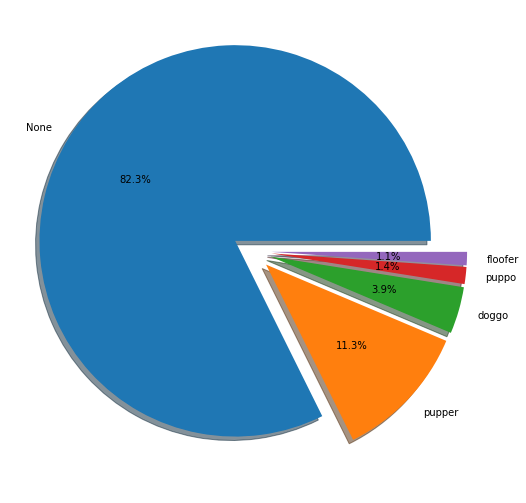

None       1641
Pupper      225
Doggo        77
Puppo        28
Floofer      22
Name: dog_stage, dtype: int64

In [478]:
#specify size of pie chart
fig, ax = plt.subplots(figsize=(9, 9))
# Percentage of dog_stage

x = df_cleaned["dog_stage"].value_counts()

plt.pie(x,labels=['None','pupper','doggo','puppo','floofer'],shadow=True,explode=(.1,.1,.1,.1,.1),autopct='%1.1f%%')
plt.show()
display(x)

In [450]:
# Value count of no of image column
df_cleaned['img_num'].value_counts().plot(kind='bar');

### Insights:
1. There is a positive correlation between favorite_count and retweet_count


2. Pupper is the highest recorded dog stage and Floofer is the least recorded dog stage


3. The no of image had no significant impact.